# 房价预测案例

## 数据清洗

In [4]:
import numpy as np
import pandas as pd
import scipy.stats

* 读入数据

In [5]:
train_df = pd.read_csv('../input/train.csv', index_col=0)
test_df = pd.read_csv('../input/test.csv', index_col=0)

In [6]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* 平滑数据

用内嵌的matplotlib进行简单的数据可视化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11569f438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115791400>]], dtype=object)

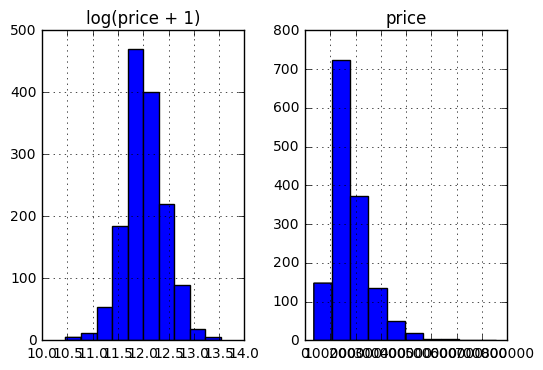

In [7]:
%matplotlib inline
prices = pd.DataFrame({'price':train_df['SalePrice'], "log(price + 1)": np.log1p(train_df["SalePrice"])})
prices.hist()

** Q：为什么要用log1p进行数据平滑的处理？**

In [8]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
t = np.log1p(train_df["SalePrice"])
t.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [10]:
scipy.stats.mode(train_df["SalePrice"])

ModeResult(mode=array([140000]), count=array([20]))

注意**hist**的用法，暂时不清楚起y轴代表的含义；

同时注意log1p和expm1的用法，作用是避免复值的影响，平滑化；

In [11]:
y_train = np.log1p(train_df.pop('SalePrice'))

In [12]:
all_df = pd.concat((train_df, test_df), axis=0)

合并数据

In [13]:
all_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [14]:
all_df.shape()

TypeError: 'tuple' object is not callable

In [15]:
all_df.shape

(2919, 79)

In [16]:
all_df["MSSubClass"] = all_df["MSSubClass"].astype(str)

In [17]:
all_df["MSSubClass"].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [18]:
all_df["MSSubClass"].dtype

dtype('O')

In [19]:
pd.get_dummies(all_df["MSSubClass"], prefix = "MSSubClass").head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### One-hot Encoding 
** 分类数据的处理方式 把category的变量转变成numerical表达形式 例如Excel **

这样做的好处主要有：

解决了分类器不好处理属性数据的问题

在一定程度上也起到了扩充特征的作用

> ** 举例 **

> 我们基于Python和Scikit-learn写一个简单的例子：

> from sklearn import preprocessing

> enc = preprocessing.OneHotEncoder()

> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])

> enc.transform([[0, 1, 3]]).toarray()

> 输出结果：

> array([[ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]])

In [20]:
all_dummy_df = pd.get_dummies(all_df)

In [21]:
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
all_dummy_df.isnull().sum().sort_values(ascending = False).head(20)

LotFrontage             486
GarageYrBlt             159
MasVnrArea               23
BsmtHalfBath              2
BsmtFullBath              2
BsmtFinSF2                1
GarageCars                1
TotalBsmtSF               1
BsmtUnfSF                 1
GarageArea                1
BsmtFinSF1                1
Condition1_Artery         0
Condition2_Feedr          0
Condition2_Artery         0
Neighborhood_Somerst      0
Neighborhood_StoneBr      0
Neighborhood_Timber       0
Neighborhood_Veenker      0
Condition1_Feedr          0
Condition1_RRAn           0
dtype: int64

In [23]:
all_dummy_df.isnull().sum().sum()

678

In [24]:
mean_cols = all_dummy_df.mean()
mean_cols.head()

LotFrontage       69.305795
LotArea        10168.114080
OverallQual        6.089072
OverallCond        5.564577
YearBuilt       1971.312778
dtype: float64

In [25]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [26]:
all_dummy_df.isnull().sum().sum()

0

In [27]:
all_dummy_df.dtypes

LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
BsmtFinSF1               float64
BsmtFinSF2               float64
BsmtUnfSF                float64
TotalBsmtSF              float64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath             float64
BsmtHalfBath             float64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageCars               float64
GarageArea               float64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPorch              int64
3SsnPorch                  int64
          

**object -- 代表了字符串类型**

In [28]:
numeric_cols = all_df.columns[all_df.dtypes != 'object']

In [29]:
numric_cols.head()

NameError: name 'numric_cols' is not defined

In [30]:
all_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [31]:
all_df.dtypes != 'object'

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea           True
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual       True
OverallCond       True
YearBuilt         True
YearRemodAdd      True
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
                 ...  
HalfBath          True
BedroomAbvGr      True
KitchenAbvGr      True
KitchenQual      False
TotRmsAbvGrd      True
Functional       False
Fireplaces        True
FireplaceQu      False
GarageType       False
GarageYrBlt       True
GarageFinish     False
GarageCars        True
GarageArea 

### 数据平滑化
计算标准分布：(X-X')/s

Pandas使用loc[]方法来选择行的数据

In [32]:
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [33]:
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [34]:
dummy_numeric_cols = all_dummy_df.columns[all_dummy_df.dtypes != 'object']

In [35]:
dummy_numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=303)

In [36]:
train_dummy_df = all_dummy_df[train_df.index]
test_dummy_df = all_dummy_df[test_df.index]

IndexError: indices are out-of-bounds

In [37]:
train_dummy_df = all_dummy_df.loc[train_df.index]
test_dummy_df = all_dummy_df.loc[test_df.index]

In [38]:
train_dummy_df.shape

(1460, 303)

In [39]:
test_dummy_df.shape

(1459, 303)

## 建立模型
### Ridge Regression
可以用来处理下面两类问题：一是数据点少于变量个数；二是变量间存在共线性。

对于多因子的数据集，这种模型可以方便的把所有的var都无脑的放进去

In [51]:
from sklearn.linear_model import Ridge

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
X_train = train_dummy_df.values
X_test = test_dummy_df.values

用sklearn中现成的方法进行交叉验证

In [54]:
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

进行调参，用数据可视化观察当alpha值多少时模型表现最好

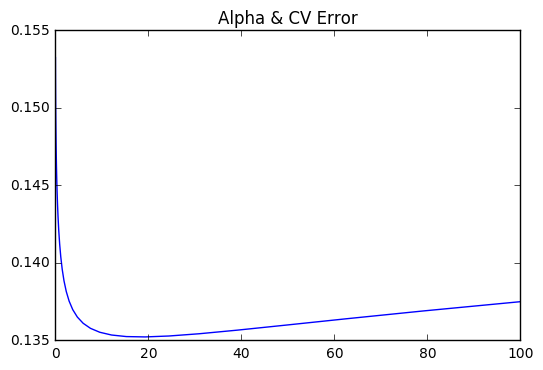

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("Alpha & CV Error");

横轴是alpha 从图中可以看出当alpha取18左右的值时 score达到0.135-0.136之间

## Random Forest

同理使用随机森林的方法建立模型并且观察比较

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

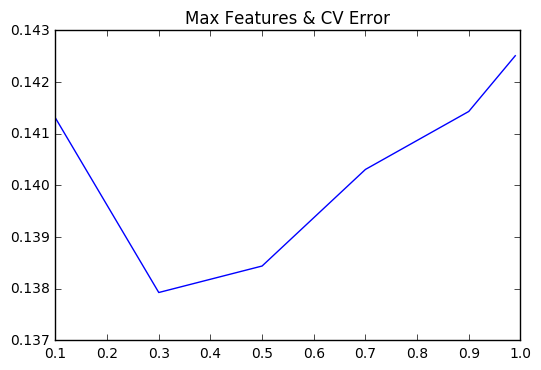

In [58]:
plt.plot(max_features, test_scores)
plt.title("Max Features & CV Error");

从图中可以看出调参后score最低为 0.137-0.138 之间